# Классификация с помощью алгоритма K ближайших соседей (2-е ДМЗ)

> Выполнил: Власов Максим Сергеевич, студент группы 381806-1 ННГУ им. Лобачевского

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

## Информация о датасете

Датасет содержит информацию об опубликованных на новостном сайте материалах, в том числе количество слов, ссылок, картинок, день публикации, некоторые синтетические метрики (доля положительных и отрицательных суждений, нейтральность/полярность заголовка и т. д.), а также количество выполнений пользователями действия "Поделиться" (оно же является значением, предсказание которого является задачей классификации для приведенного датасета).

Авторы:

* Kelwin Fernandes (kafc@inesctec.pt, kelwinfc@gmail.com) - INESC TEC, Porto, Portugal/Universidade do Porto, Portugal.
* Pedro Vinagre (pedro.vinagre.sousa@gmail.com) - ALGORITMI Research Centre, Universidade do Minho, Portugal
* Paulo Cortez - ALGORITMI Research Centre, Universidade do Minho, Portugal
* Pedro Sernadela - Universidade de Aveiro

Описание с сайта источника:

* The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls.
* Acquisition date: January 8, 2015
* The estimated relative performance values were estimated by the authors using a Random Forest classifier and a rolling windows as assessment method. See their article for more details on how the relative performance values were set.


### Атрибуты

Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

\# | name | description
--- | --- | ---
0  | url | URL of the article (non-predictive)
1  | timedelta | Days between the article publication and the dataset acquisition (non-predictive)
2  | n_tokens_title | Number of words in the title
3  | n_tokens_content | Number of words in the content
4  | n_unique_tokens | Rate of unique words in the content
5  | n_non_stop_words | Rate of non-stop words in the content
6  | n_non_stop_unique_tokens | Rate of unique non-stop words in the content
7  | num_hrefs | Number of links
8  | num_self_hrefs | Number of links to other articles published by Mashable
9  | num_imgs | Number of images
10 | num_videos | Number of videos
11 | average_token_length | Average length of the words in the content
12 | num_keywords | Number of keywords in the metadata
13 | data_channel_is_lifestyle | Is data channel 'Lifestyle'?
14 | data_channel_is_entertainment | Is data channel 'Entertainment'?
15 | data_channel_is_bus | Is data channel 'Business'?
16 | data_channel_is_socmed | Is data channel 'Social Media'?
17 | data_channel_is_tech | Is data channel 'Tech'?
18 | data_channel_is_world | Is data channel 'World'?
19 | kw_min_min | Worst keyword (min. shares)
20 | kw_max_min | Worst keyword (max. shares)
21 | kw_avg_min | Worst keyword (avg. shares)
22 | kw_min_max | Best keyword (min. shares)
23 | kw_max_max | Best keyword (max. shares)
24 | kw_avg_max | Best keyword (avg. shares)
25 | kw_min_avg | Avg. keyword (min. shares)
26 | kw_max_avg | Avg. keyword (max. shares)
27 | kw_avg_avg | Avg. keyword (avg. shares)
28 | self_reference_min_shares | Min. shares of referenced articles in Mashable
29 | self_reference_max_shares | Max. shares of referenced articles in Mashable
30 | self_reference_avg_sharess | Avg. shares of referenced articles in Mashable
31 | weekday_is_monday | Was the article published on a Monday?
32 | weekday_is_tuesday | Was the article published on a Tuesday?
33 | weekday_is_wednesday | Was the article published on a Wednesday?
34 | weekday_is_thursday | Was the article published on a Thursday?
35 | weekday_is_friday | Was the article published on a Friday?
36 | weekday_is_saturday | Was the article published on a Saturday?
37 | weekday_is_sunday | Was the article published on a Sunday?
38 | is_weekend | Was the article published on the weekend?
39 | LDA_00 | Closeness to LDA topic 0
40 | LDA_01 | Closeness to LDA topic 1
41 | LDA_02 | Closeness to LDA topic 2
42 | LDA_03 | Closeness to LDA topic 3
43 | LDA_04 | Closeness to LDA topic 4
44 | global_subjectivity | Text subjectivity
45 | global_sentiment_polarity | Text sentiment polarity
46 | global_rate_positive_words | Rate of positive words in the content
47 | global_rate_negative_words | Rate of negative words in the content
48 | rate_positive_words | Rate of positive words among non-neutral tokens
49 | rate_negative_words | Rate of negative words among non-neutral tokens
50 | avg_positive_polarity | Avg. polarity of positive words
51 | min_positive_polarity | Min. polarity of positive words
52 | max_positive_polarity | Max. polarity of positive words
53 | avg_negative_polarity | Avg. polarity of negative words
54 | min_negative_polarity | Min. polarity of negative words
55 | max_negative_polarity | Max. polarity of negative words
56 | title_subjectivity | Title subjectivity
57 | title_sentiment_polarity | Title polarity
58 | abs_title_subjectivity | Absolute subjectivity level
59 | abs_title_sentiment_polarity | Absolute polarity level
60 | shares | Number of shares (target)

## Загрузка данных

In [2]:
DATASET_NAME = "OnlineNewsPopularity.csv"
DATASET_PATH = os.path.realpath(os.path.join(os.getcwd(), "datasets", DATASET_NAME))
if not os.path.exists(DATASET_PATH):
    print(DATASET_PATH + ": файл не найден. Обратитесь к инструкции ../datasets/README.md.")

In [3]:
data_raw = pd.read_csv(DATASET_PATH)
data_raw.columns = data_raw.columns.str.strip()

Количество строк и столбцов:

In [4]:
data_raw.shape

(39644, 61)

Исходные столбцы:

In [5]:
print(*data_raw.columns, sep=", ")

url, timedelta, n_tokens_title, n_tokens_content, n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens, num_hrefs, num_self_hrefs, num_imgs, num_videos, average_token_length, num_keywords, data_channel_is_lifestyle, data_channel_is_entertainment, data_channel_is_bus, data_channel_is_socmed, data_channel_is_tech, data_channel_is_world, kw_min_min, kw_max_min, kw_avg_min, kw_min_max, kw_max_max, kw_avg_max, kw_min_avg, kw_max_avg, kw_avg_avg, self_reference_min_shares, self_reference_max_shares, self_reference_avg_sharess, weekday_is_monday, weekday_is_tuesday, weekday_is_wednesday, weekday_is_thursday, weekday_is_friday, weekday_is_saturday, weekday_is_sunday, is_weekend, LDA_00, LDA_01, LDA_02, LDA_03, LDA_04, global_subjectivity, global_sentiment_polarity, global_rate_positive_words, global_rate_negative_words, rate_positive_words, rate_negative_words, avg_positive_polarity, min_positive_polarity, max_positive_polarity, avg_negative_polarity, min_negative_polarity, max_negative

## Предобработка данных

### Преобразование признаков

Перед работой с данными преобразуем некоторые признаки: 

* Изменим признак `shares` таким образом, чтобы он был пригоден для задачи классификации. Для этого введем новый признак `shares_discr`, имеющий два класса **0** и **1**: пусть он равен **0**, если соответствующее значение `shares` не превышает 5000, и **1** в противном случае.
* Введем категориальный признак `data_channel`, содержащий тематику статьи (lifestyle, entertainment, bus, socmed, tech, world), для повышения наглядности визуализации.

In [6]:
data_raw["shares_discr"] = np.where(data_raw["shares"] >= 5000, 1, 0)
data_raw["shares_discr"].value_counts()


0    34464
1     5180
Name: shares_discr, dtype: int64

In [7]:
data_raw["data_channel"] = data_raw.apply(lambda row: "lifestyle" if row["data_channel_is_lifestyle"] else
                                                      "entertainment" if row["data_channel_is_entertainment"] else
                                                      "bus" if row["data_channel_is_bus"] else
                                                      "socmed" if row["data_channel_is_socmed"] else
                                                      "tech" if row["data_channel_is_tech"] else
                                                      "world" if row["data_channel_is_world"] else
                                                      "other", axis=1)
data_raw["data_channel"] = data_raw["data_channel"].astype("category")
data_raw["data_channel"].value_counts()


world            8427
tech             7346
entertainment    7057
bus              6258
other            6134
socmed           2323
lifestyle        2099
Name: data_channel, dtype: int64

### Выбор столбцов

Наконец, оставим только наиболее "интересные" столбцы.

In [8]:
columns = ["n_tokens_title", "n_tokens_content", "num_hrefs", "num_imgs", "num_videos", "is_weekend", "global_rate_positive_words", "global_rate_negative_words", "global_subjectivity", "global_sentiment_polarity", "data_channel", "shares_discr"]
data = data_raw.loc[:, columns]

In [9]:
data.head(10)

,n_tokens_title,n_tokens_content,num_hrefs,num_imgs,num_videos,is_weekend,global_rate_positive_words,global_rate_negative_words,global_subjectivity,global_sentiment_polarity,data_channel,shares_discr
0,12.0,219.0,4.0,1.0,0.0,0.0,0.045662,0.013699,0.521617,0.092562,entertainment,0
1,9.0,255.0,3.0,1.0,0.0,0.0,0.043137,0.015686,0.341246,0.148948,bus,0
2,9.0,211.0,3.0,1.0,0.0,0.0,0.056872,0.009479,0.702222,0.323333,bus,0
3,9.0,531.0,9.0,1.0,0.0,0.0,0.041431,0.020716,0.429850,0.100705,entertainment,0
4,13.0,1072.0,19.0,20.0,0.0,0.0,0.074627,0.012127,0.513502,0.281003,tech,0
5,10.0,370.0,2.0,0.0,0.0,0.0,0.029730,0.027027,0.437409,0.071184,tech,0
6,8.0,960.0,21.0,20.0,0.0,0.0,0.080208,0.016667,0.514480,0.268303,lifestyle,0
7,12.0,989.0,20.0,20.0,0.0,0.0,0.083923,0.015167,0.543474,0.298613,tech,0
8,11.0,97.0,2.0,0.0,0.0,0.0,0.030928,0.020619,0.538889,0.161111,tech,0
9,10.0,231.0,4.0,1.0,1.0,0.0,0.038961,0.030303,0.313889,0.051852,world,0


## Визуализация данных

Благодаря выбору целевого признака наблюдается значительная несбалансированность классов: объектов класса **0** намного больше, чем объектов класса **1**.

In [10]:
data["shares_discr"].value_counts()

0    34464
1     5180
Name: shares_discr, dtype: int64

Ниже представлены некоторые метрические характеристики числовых признаков:

* `count` - число значений
* `mean` - среднее арифметическое
* `std` - разброс
* `min` - минимальное значение
* `max` - максимальное значение

In [11]:
data.describe()

,n_tokens_title,n_tokens_content,num_hrefs,num_imgs,num_videos,is_weekend,global_rate_positive_words,global_rate_negative_words,global_subjectivity,global_sentiment_polarity,shares_discr
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,10.883690,4.544143,1.249874,0.130915,0.039625,0.016612,0.443370,0.119309,0.130663
std,2.114037,471.107508,11.332017,8.309434,4.107855,0.337312,0.017429,0.010828,0.116685,0.096931,0.337036
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000
25%,9.000000,246.000000,4.000000,1.000000,0.000000,0.000000,0.028384,0.009615,0.396167,0.057757,0.000000
50%,10.000000,409.000000,8.000000,1.000000,0.000000,0.000000,0.039023,0.015337,0.453457,0.119117,0.000000
75%,12.000000,716.000000,14.000000,4.000000,1.000000,0.000000,0.050279,0.021739,0.508333,0.177832,0.000000
max,23.000000,8474.000000,304.000000,128.000000,91.000000,1.000000,0.155488,0.184932,1.000000,0.727841,1.000000


Введенный категориальный признак `data_channel` принимает 7 различных значений, самое часто встречающееся - **world**.

In [12]:
data_raw.describe(include=["category"])

,data_channel
count,39644
unique,7
top,world
freq,8427


Можно вычислить матрицу корреляции, чтобы выявить возможные связи признаков между собой (а вернее, их отсутствие - ввиду тематики датасета большинство признаков являются совершенно независимыми "по определению").

In [13]:
corr_mat = data.corr()
corr_mat

,n_tokens_title,n_tokens_content,num_hrefs,num_imgs,num_videos,is_weekend,global_rate_positive_words,global_rate_negative_words,global_subjectivity,global_sentiment_polarity,shares_discr
n_tokens_title,1.000000,0.018160,-0.053496,-0.008858,0.051460,-0.005996,-0.064951,0.015530,-0.056804,-0.072226,-0.009294
n_tokens_content,0.018160,1.000000,0.423065,0.342600,0.103699,0.052024,0.133979,0.125013,0.127879,0.021937,0.006170
num_hrefs,-0.053496,0.423065,1.000000,0.342633,0.114518,0.072279,0.056428,0.032515,0.203464,0.086859,0.076928
num_imgs,-0.008858,0.342600,0.342633,1.000000,-0.067336,0.053242,-0.041582,0.024772,0.080468,0.021082,0.072411
num_videos,0.051460,0.103699,0.114518,-0.067336,1.000000,-0.016054,0.072290,0.179167,0.082052,-0.028434,0.039749
is_weekend,-0.005996,0.052024,0.072279,0.053242,-0.016054,1.000000,0.034730,0.011340,0.020138,0.021931,0.041683
global_rate_positive_words,-0.064951,0.133979,0.056428,-0.041582,0.072290,0.034730,1.000000,0.106538,0.467063,0.570667,0.010995
global_rate_negative_words,0.015530,0.125013,0.032515,0.024772,0.179167,0.011340,0.106538,1.000000,0.253181,-0.471982,0.010829
global_subjectivity,-0.056804,0.127879,0.203464,0.080468,0.082052,0.020138,0.467063,0.253181,1.000000,0.339436,0.048039
global_sentiment_polarity,-0.072226,0.021937,0.086859,0.021082,-0.028434,0.021931,0.570667,-0.471982,0.339436,1.000000,0.014053


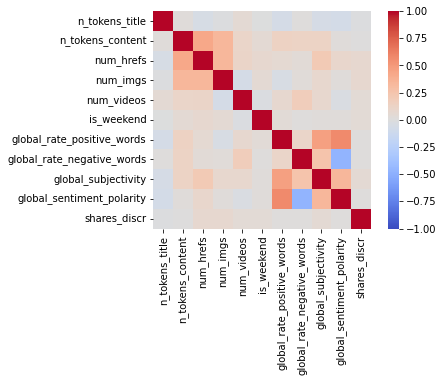

In [30]:
seaborn.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap="coolwarm")
pass

Как и следовало ожидать, признаки практически не коррелируют друг с другом.

In [15]:
corr_mat.where(np.triu(corr_mat > 0.4, k=1)).stack().sort_values(ascending=False)

global_rate_positive_words  global_sentiment_polarity    0.570667
                            global_subjectivity          0.467063
n_tokens_content            num_hrefs                    0.423065
dtype: float64

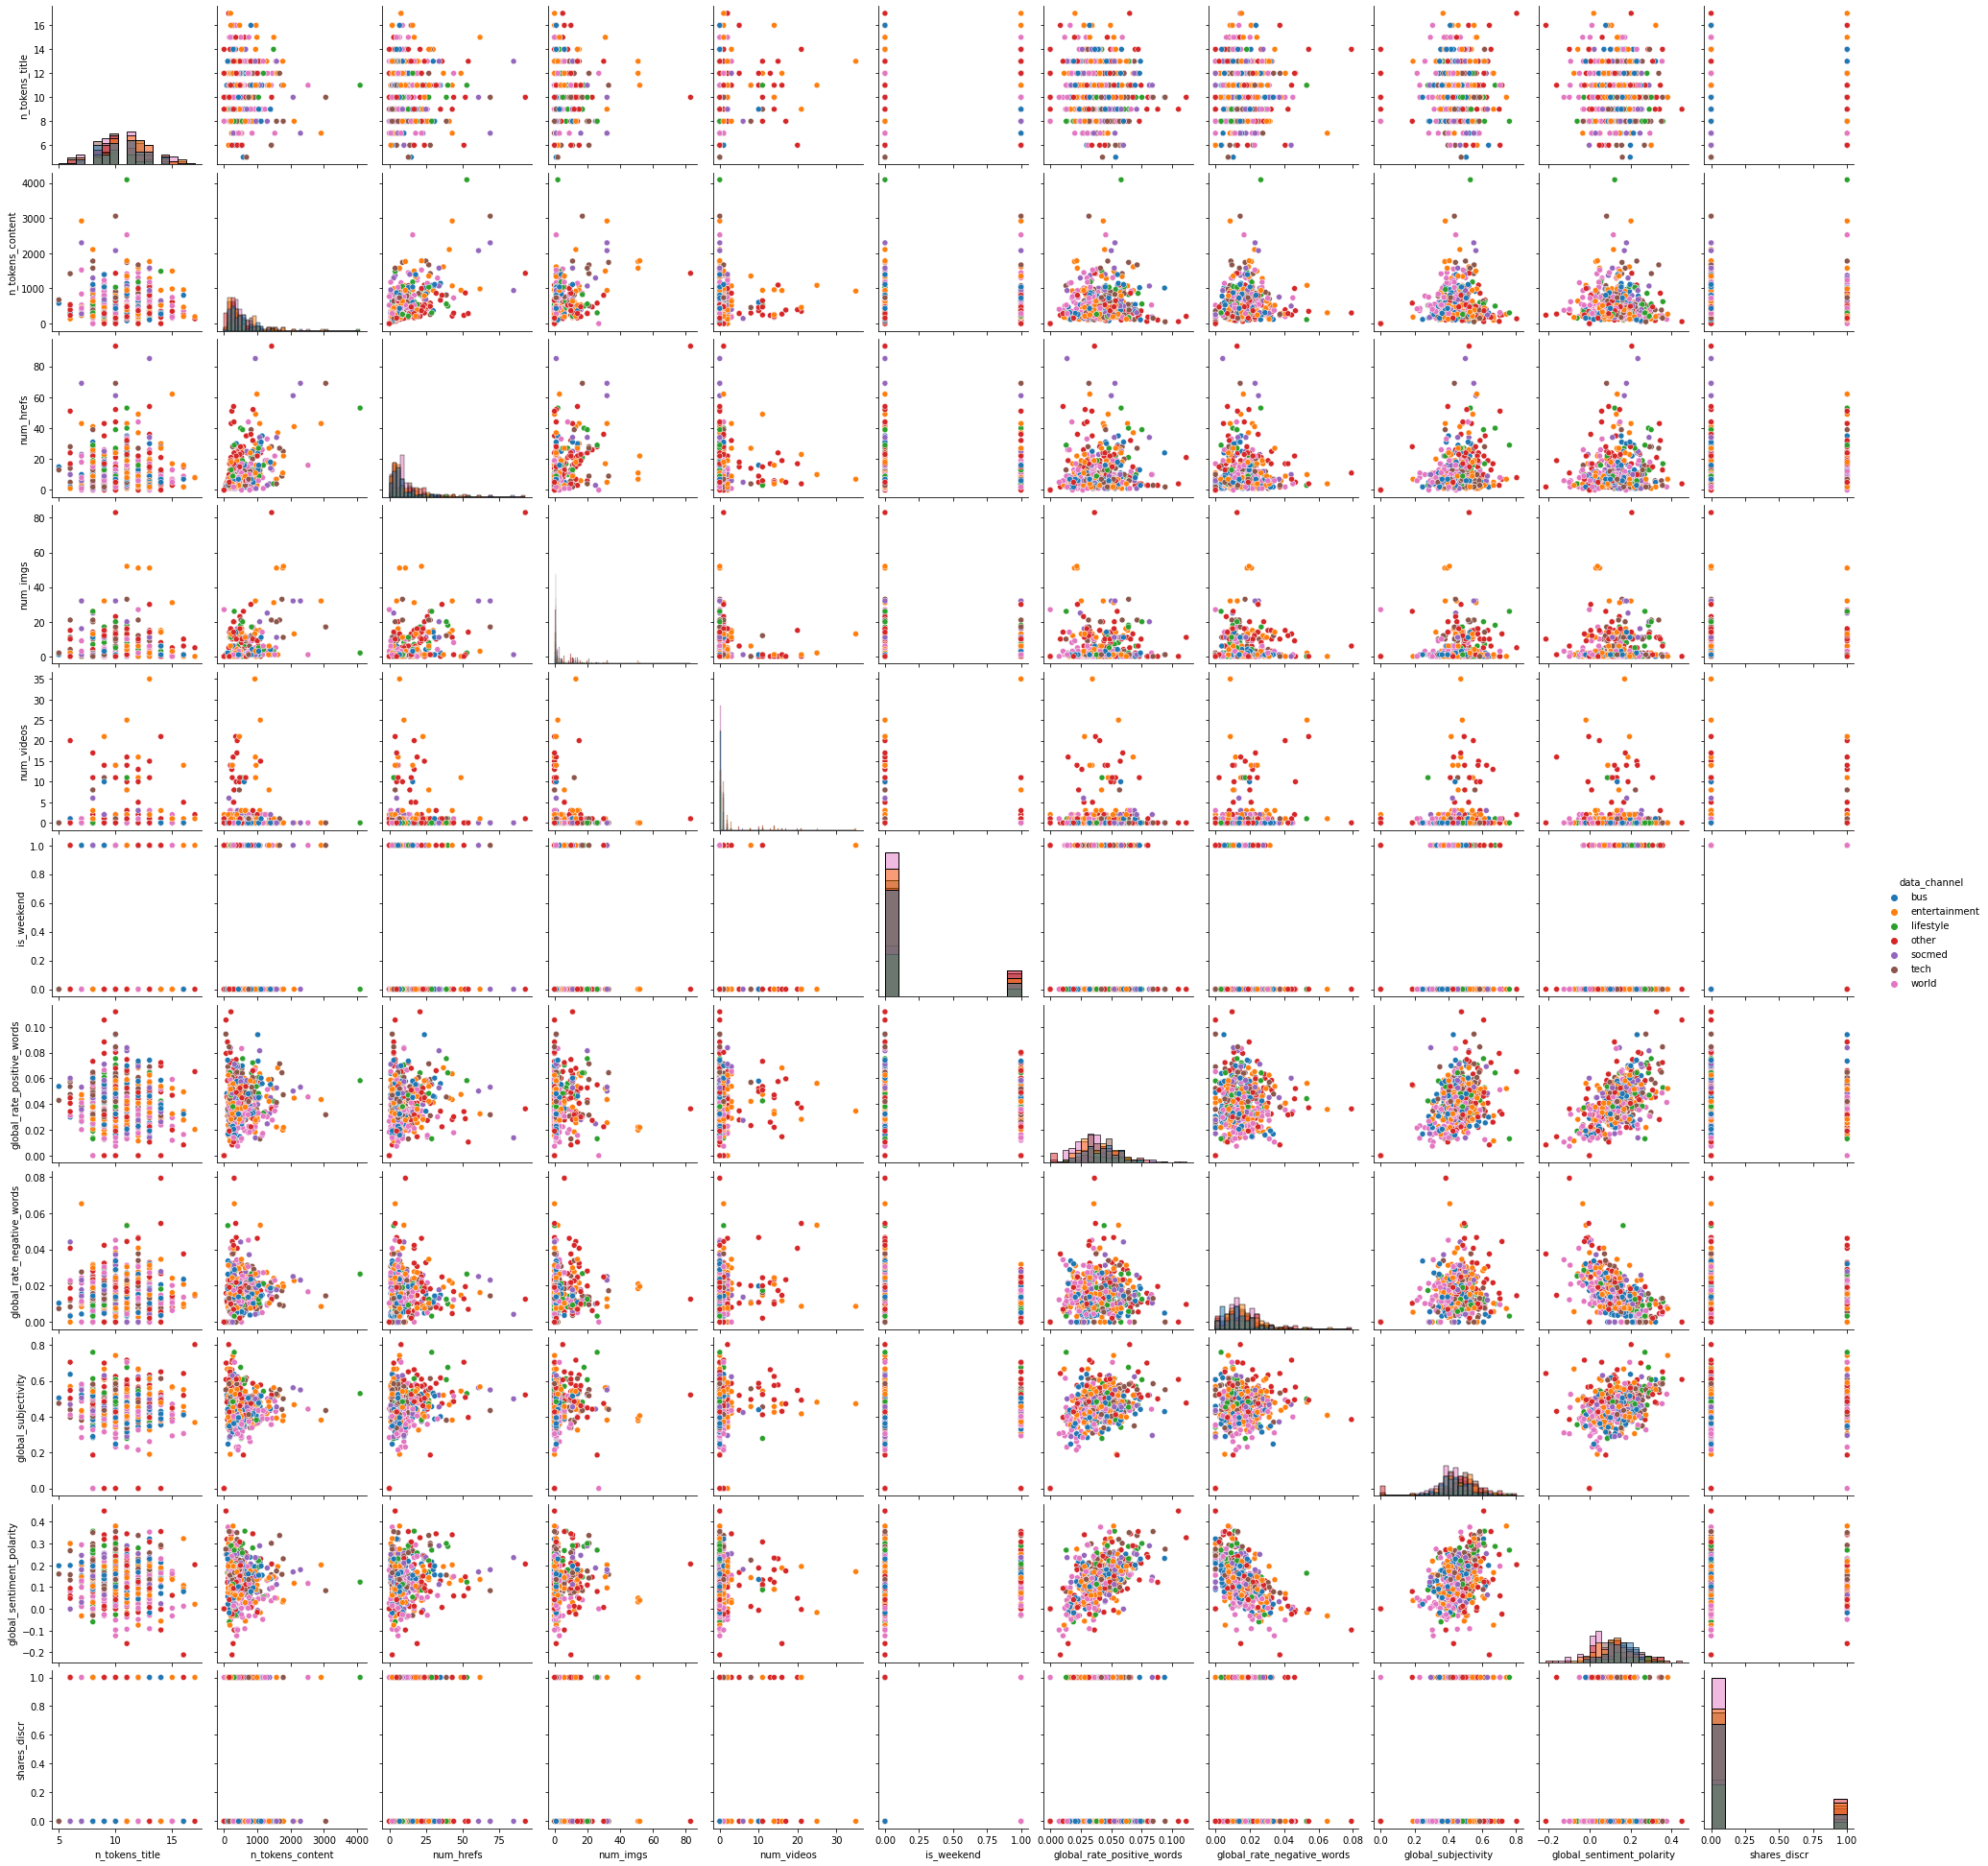

In [16]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=500, replace=False)
seaborn.pairplot(data.iloc[random_subset], hue="data_channel", diag_kind="hist")
pass

## Оптимизация

### Обработка категориальных признаков

В целях повышения наглядности визуализации намеренно были введены категориальные признаки. Теперь от них можно избавиться путем ввода бинарных признаков для каждой из категорий.

In [17]:
data = pd.get_dummies(data)

### Нормализация

Нормализация числовых признаков выполняется путем линейного преобразования диапазона каждого из значений к отрезку $[0; 1]$.

In [18]:
data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
data.describe()

,n_tokens_title,n_tokens_content,num_hrefs,num_imgs,num_videos,is_weekend,global_rate_positive_words,global_rate_negative_words,global_subjectivity,global_sentiment_polarity,shares_discr,data_channel_bus,data_channel_entertainment,data_channel_lifestyle,data_channel_other,data_channel_socmed,data_channel_tech,data_channel_world
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.399940,0.064493,0.035802,0.035501,0.013735,0.130915,0.254842,0.089828,0.443370,0.457439,0.130663,0.157855,0.178009,0.052946,0.154727,0.058597,0.185299,0.212567
std,0.100668,0.055594,0.037276,0.064917,0.045141,0.337312,0.112090,0.058550,0.116685,0.086422,0.337036,0.364610,0.382525,0.223929,0.361649,0.234871,0.388545,0.409129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.029030,0.013158,0.007812,0.000000,0.000000,0.182550,0.051994,0.396167,0.402560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.380952,0.048265,0.026316,0.007812,0.000000,0.000000,0.250970,0.082936,0.453457,0.457267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.476190,0.084494,0.046053,0.031250,0.010989,0.000000,0.323365,0.117552,0.508333,0.509617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Классификация

Проведем классификацию с помощью нескольких алгоритмов машинного обучения и сравним результаты. Для работы с моделями будут использоваться все выбранные признаки.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


В качестве обучающей выборки возьмем 75% данных, остальные 25% включим в тестовую.

In [20]:
X = data.drop(["shares_discr"], 1)
y = data["shares_discr"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5924)

### K ближайших соседей

* 5 соседей (по умолчанию)

In [21]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 0.8757945716880234, test 0.8567248511754616
Mean-squared error: train 0.12420542831197659, test 0.1432751488245384


* 8 соседей

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 0.870480610769179, test 0.867520936333367
Mean-squared error: train 0.12951938923082099, test 0.13247906366663303


* 10 соседей

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 0.8701106514647026, test 0.8681263242861467
Mean-squared error: train 0.1298893485352975, test 0.1318736757138533


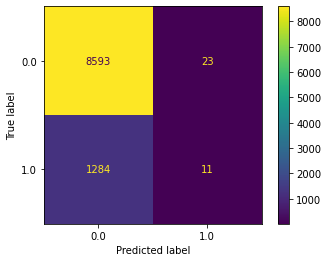

In [24]:
confusion = confusion_matrix(y_test, y_test_pred, labels=knn_model.classes_)
display = ConfusionMatrixDisplay(
    confusion_matrix=confusion, display_labels=knn_model.classes_)
display.plot()
plt.show()
pass


### Random forest

In [25]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 0.9958968149867151, test 0.8687317122389264
Mean-squared error: train 0.004103185013284902, test 0.13126828776107355


In [26]:
rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 0.9959304476507584, test 0.8689335082231864
Mean-squared error: train 0.004069552349241583, test 0.13106649177681365


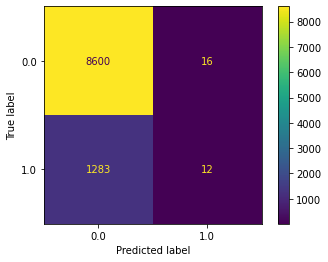

In [27]:
confusion = confusion_matrix(y_test, y_test_pred, labels=rf_model.classes_)
display = ConfusionMatrixDisplay(
    confusion_matrix=confusion, display_labels=rf_model.classes_)
display.plot()
plt.show()
pass

In [28]:
pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

global_subjectivity           0.136313
n_tokens_content              0.136127
global_sentiment_polarity     0.134060
global_rate_positive_words    0.133998
global_rate_negative_words    0.127682
num_hrefs                     0.091342
n_tokens_title                0.076712
num_imgs                      0.065889
num_videos                    0.033343
is_weekend                    0.012478
data_channel_other            0.012002
data_channel_tech             0.007741
data_channel_entertainment    0.007530
data_channel_world            0.006611
data_channel_bus              0.006607
data_channel_lifestyle        0.005906
data_channel_socmed           0.005658
dtype: float64

## Выводы

* Алгоритм _K ближайших соседей_ проигрывает алгоритму _Random forest_ по точности как на тестовой выборке (незначительно), так и на обучающей (значительно)
* С увеличением числа ближайших соседей в одноименном алгоритме может увеличиться точность, есть возможность подобрать значение, при котром достигается наибольшая точность
* Чем больше решающих деревьев создается в ансамбле алгоритма _Random forest_, тем точнее он работает